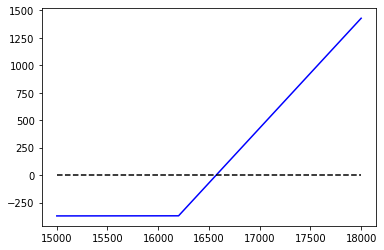

In [20]:
import numpy as np # 矩陣儲存
import matplotlib.pyplot as plt

def longcall(ST, K, call_price):
  return np.maximum(ST-K, 0) - call_price


ST = np.arange(15001, 18001)
LC16200 = longcall(ST, 16200, 372)

plt.plot(ST, LC16200, 'b-')             # (x, y, 藍實線)
plt.plot([15001, 18000], [0,0], 'k--')  # 再畫上(x, y, 黑虛線)



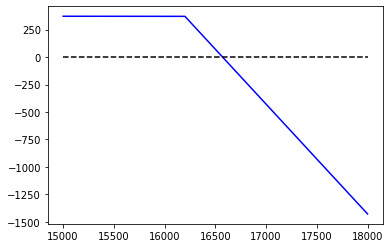

In [21]:
def shortcall(ST, K, call_price):
  return -(np.maximum(ST-K, 0) - call_price) # 與longcall為zero-sum 直接加負號負號

ST = np.arange(15001, 18001)
SC16200 = shortcall(ST, 16200, 372)

plt.plot(ST, SC16200, 'b-')             # (x, y, 藍實線)
plt.plot([15001, 18000], [0,0], 'k--')  # 再畫上(x, y, 黑虛線)

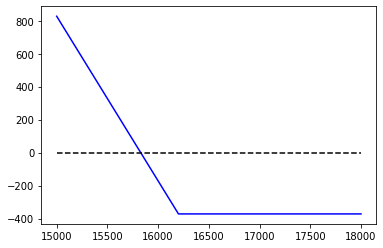

In [22]:
def longput(ST, K, put_price):
  return np.maximum(K-ST, 0) - put_price # 跌了就執行，賺！

ST = np.arange(15001, 18001)
LP16200 = longput(ST, 16200, 372)

plt.plot(ST, LP16200, 'b-')             # (x, y, 藍實線)
plt.plot([15001, 18000], [0,0], 'k--')  # 再畫上(x, y, 黑虛線)

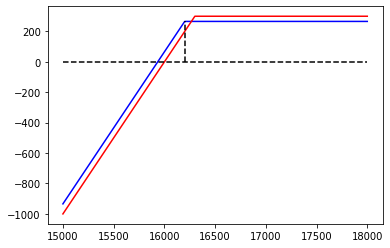

In [23]:
def shortput(ST, K, put_price):
  return -np.maximum(K-ST, 0) + put_price # 跌了別人就會執行

ST = np.arange(15001, 18001)
SP16200 = shortput(ST, 16200, 265)
SP16300 = shortput(ST, 16300, 299)

plt.plot(ST, SP16200, 'b-')             # (x, y, 藍實線)
plt.plot(ST, SP16300, 'r-')             # (x, y, 紅實線)
plt.plot([15001, 18000], [0,0], 'k--')  # 再畫上(x, y, 黑虛線)
plt.plot([16200,16200], [0,265], 'k--')

### Spread 價差
#### --
#### 多頭（bull spread)：預期小漲，但僅承擔有限風險 >> S
#### 空頭（bear spread)：預期小跌，但僅承擔有限風險 >> z
#### --
#### 盤整(蝶式/butterfly) 都是「賣權」！！且控制有限風險。
#### 買進：預期市場盤整 >> \_Ａ\_
#### 賣出：預期小漲或小跌 >> -V-
#### --
#### 跨式(尖)：'K相同'的call、put同時買或賣
#### 勒式(平)：'K不同'的 Kcall > Kput同時買或賣
##### 買進：大幅變動但未知方向，大漲大落都賺
##### 賣出：盤整就賺，大漲大落都會虧爆無限

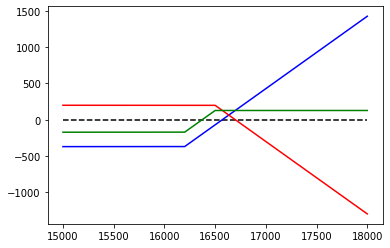

In [24]:
# 多頭 買低(16200)賣高(16500)
LC16200 = longcall(ST, 16200, 372)
SC16500 = shortcall(ST, 16500, 199)
plt.plot([15001, 18000], [0,0], 'k--')  # 再畫上(x, y, 黑虛線)

plt.plot(ST, LC16200, 'b-')             # (x, y, 藍實線)
plt.plot(ST, SC16500, 'r-')             # (x, y, 紅實線)
plt.plot(ST, SC16500+LC16200, 'g-')             # (x, y, 紅實線)

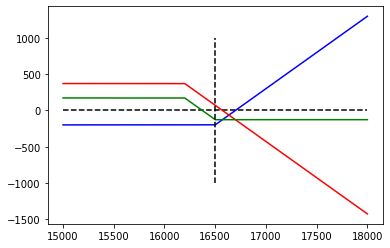

In [25]:
# 空頭 買高(16500)賣低(16200)
LC16500 = longcall(ST, 16500, 199)
SC16200 = shortcall(ST, 16200, 372)
plt.plot([15001, 18000], [0,0], 'k--')  # 再畫上(x, y, 黑虛線)

plt.plot(ST, LC16500, 'b-')             # (x, y, 藍實線)
plt.plot(ST, SC16200, 'r-')             # (x, y, 紅實線)
plt.plot(ST, SC16200+LC16500, 'g-')      # (x, y, 紅實線)
plt.plot([16500,16500], [-1000, 1000], 'k--')

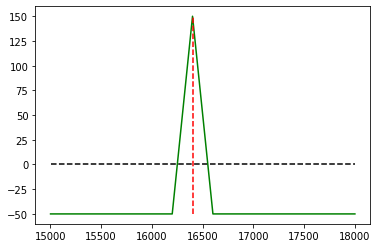

In [26]:
# 買進盤整蝶式：買低買高賣中間*2！
LP16200 = longput(ST, 16200, 265)
LP16600 = longput(ST, 16600, 463)
SP16400 = shortput(ST, 16400, 339)
plt.plot([15001, 18000], [0,0], 'k--')         # 再畫上(x, y, 黑虛線)

plt.plot(ST, LP16200+LP16600+2*SP16400, 'g-')  # (x, y, 紅實線)

plt.plot([16400, 16400], [-50,150], 'r--') 

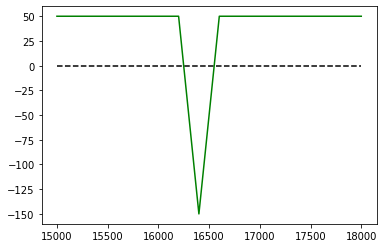

In [27]:
# 賣出盤整蝶式：賣低賣高買中間*2！
SP16200 = shortput(ST, 16200, 265)
SP16600 = shortput(ST, 16600, 463)
LP16400 = longput(ST, 16400, 339)
plt.plot([15001, 18000], [0,0], 'k--')         # 再畫上(x, y, 黑虛線)

plt.plot(ST, SP16200+SP16600+2*LP16400, 'g-')  # (x, y, 紅實線)

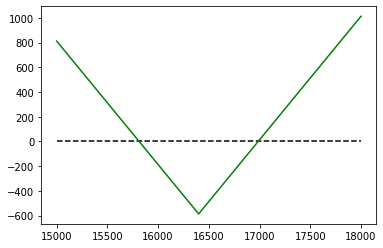

In [28]:
# 買進straddle：同價位P/C都買！
LC16400 = longcall(ST, 16400, 248)
LP16400 = longput(ST, 16400, 339)

plt.plot([15001, 18000], [0,0], 'k--')    # 再畫上(x, y, 黑虛線)

plt.plot(ST, LC16400+LP16400, 'g-')       # (x, y, 紅實線)

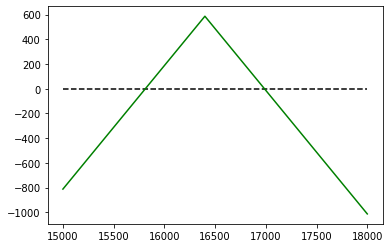

In [29]:
# 賣出straddle：同價位P/C都賣！
SC16400 = shortcall(ST, 16400, 248)
SP16400 = shortput(ST, 16400, 339)

plt.plot([15001, 18000], [0,0], 'k--')    # 再畫上(x, y, 黑虛線)

plt.plot(ST, SC16400+SP16400, 'g-')       # (x, y, 紅實線)

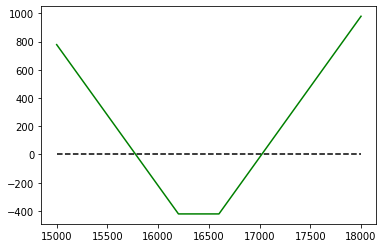

In [30]:
# 買進Strangle：不同價位P/C都買！
LC16600 = longcall(ST, 16600, 156)
LP16200 = longput(ST, 16200, 265)

plt.plot([15001, 18000], [0,0], 'k--')    # 再畫上(x, y, 黑虛線)

plt.plot(ST, LC16600+LP16200, 'g-')

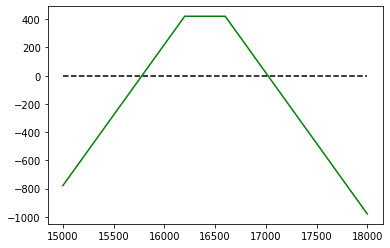

In [33]:
# 賣出Strangle：不同價位P/C都賣！
SC16600 = shortcall(ST, 16600, 156)
SP16200 = shortput(ST, 16200, 265)

plt.plot([15001, 18000], [0,0], 'k--')    # 再畫上(x, y, 黑虛線)

plt.plot(ST, SC16600+SP16200, 'g-')